█████ ISING MODEL █████

▄▄▄ FUNCTIONS ▄▄▄

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time
import math
import random 

In [2]:
def readData():
  l = []
  with open('input_Ising.txt', 'r') as f:
    l = [ line.split('#')[0].split() for line in f ]
  n = int(l[0][0])
  jVal = int(l[1][0])
  muh = float(l[2][0])
  temp1 = float(l[3][0])
  temp2 = float(l[4][0])
  ntemp = int(l[5][0])
  nmc = int(l[6][0])
  nme = int(l[7][0])
  flag = int(l[8][0])
  value = int(l[9][0])
  return n,jVal,muh,temp1,temp2,ntemp,nmc,nme,flag,value

In [3]:
def start():
  spin = []
  if flag == 0: spin = [[random.randrange(-1, 2, 2)
                                    for _ in range(n)]
                                    for _ in range(n)]
  else: spin = [[value for _ in range(n)] for _ in range(n)]
  return spin

In [4]:
def showSpin():
    plt.imshow(spin)
    plt.savefig('ISING_1.png', dpi=300, bbox_inches='tight')
    plt.show()

In [5]:
def moveMP(boltzf): #Metropolis 1/2
  for _ in range(n*n):
    #Alleatory cell
    hi = int(random.random()*(n))
    hj = int(random.random()*(n))
    #Boundary conditions: periodic
    hi1 = hi+1
    hi2 = hi-1
    hj1 = hj+1
    hj2 = hj-1
    if hi == 0: hi2 = n-1
    if hi == n-1: hi1 = 0
    if hj == 0: hj2 = n-1
    if hj == n-1: hj1 = 0
    spinVal = 2*spin[hi][hj]*(spin[hi1][hj]
                              +spin[hi2][hj]
                              +spin[hi][hj1]
                              +spin[hi][hj2])
    #Final probability:
    expVal = math.exp(-1*boltzf* (jVal*spinVal +
                                  muh*spin[hi][hj]))
    #Metropolis scheme
    if expVal > random.uniform(0, 1): 
        spin[hi][hj] = -1*spin[hi][hj]

In [6]:
def measM():
  m = 0
  for i in range(n):
    for j in range(n):
      m = m + spin[i][j]
  return m

In [7]:
def MP(name_output):
    ncicl = int(nmc/nme)
    ntot=n**2
    
    tempA = []
    amevA = []
    
    run_once = 1
    for t in range(ntemp):
      amev=0
      temp = temp1 + t * (temp2-temp1)/(ntemp-1) # Actualizamos temperatura
      boltzf = 1/temp

      start = time.time()
      for _ in range(nmc): moveMP(boltzf) 
      end = time.time()
        
      if run_once == 1 :
        print("Total time (mins):", round((end-start)*ntemp/60,2))
        run_once = 0

      start = time.time()
      for _ in range(nme):
        for _ in range(ncicl): moveMP(boltzf)
        m = measM()
        amev = amev + abs(m)
      amev = amev/(nme*ntot) #Mean value (extensive)
      end = time.time()
        
      print("Temperature:", temp)
      print("time(s):", round(end - start, 2), "\n")
      tempA.append(temp)
      amevA.append(amev)
        
    data = np.array([tempA, amevA])
    data = data.T
    with open(name_output, 'w+') as f:
      np.savetxt(f, data, fmt=['%f','%f'])

In [8]:
def readOutput(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y


def plotOutput():
    x8, y8 = readOutput('SALIDA.txt')

    data128 = []

    data128 = np.column_stack((x8,y8))



    x8,y8 = zip(*data128)

    plt.plot(x8, y8, label='8')

    plt.xlabel('T (K)')
    plt.ylabel('|M| (A/m)')
    plt.title('|M| (T)')
    plt.legend()

    plt.scatter(x8,y8)
    plt.show()

In [9]:
def motion_Ising(temp):
    for tt in range(1000):
      try:
        tt+=1
        moveMP(1/temp) 
        plt.title(tt)
        plt.imshow(spin)
        plt.pause(0.0001)     
        display.clear_output(wait=True)
      except KeyboardInterrupt:
        plt.title(tt)
        plt.imshow(spin)
        plt.savefig('ISING_2.png', dpi=300, bbox_inches='tight')
        plt.show()
        break

▄▄▄ MAIN PROGRAM ▄▄▄

In [14]:
# 1.- READ DATA

n,jVal,muh,temp1,temp2,ntemp,nmc,nme,flag,value = readData()

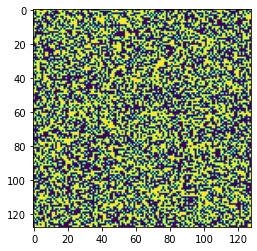

In [15]:
# 2.- CREATE AN INITIAL STATE

spin = start()

showSpin() #Show the grid

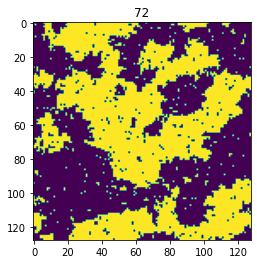

In [16]:
# 3.- HOW THE SYSTEM EVOLVES

motion_Ising(2) # motion_Ising( temperature )

Total time (mins): 6.33
Temperature: 1.0
time(s): 17.01 

Temperature: 1.1
time(s): 16.77 

Temperature: 1.2
time(s): 16.72 

Temperature: 1.3
time(s): 16.9 

Temperature: 1.4
time(s): 16.98 

Temperature: 1.5
time(s): 16.83 

Temperature: 1.6
time(s): 16.71 

Temperature: 1.7
time(s): 16.62 

Temperature: 1.8
time(s): 16.75 

Temperature: 1.9
time(s): 16.98 

Temperature: 2.0
time(s): 16.82 

Temperature: 2.1
time(s): 16.95 

Temperature: 2.2
time(s): 17.03 

Temperature: 2.3
time(s): 17.05 

Temperature: 2.4
time(s): 17.07 

Temperature: 2.5
time(s): 17.12 

Temperature: 2.6
time(s): 17.32 

Temperature: 2.7
time(s): 17.24 

Temperature: 2.8
time(s): 17.37 

Temperature: 2.9
time(s): 17.35 

Temperature: 3.0
time(s): 17.44 



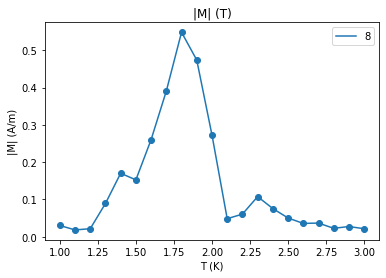

In [13]:
# 4.- CREATE GRAPHS

MP("SALIDA.txt")

plotOutput()